### Zipf's Law

Named after the American linguist George Kingsley Zipf (1902-1950), Zipf's Law describes an empirical law that describes the phenomenon in the physical and social sciences where many types of data can be approximated by Zipf distribution - a family of discrete power law probability distributions.

In linguistics, Zipf's law states that given some text of natural language, the frequency of any word is inversely proportional to its rank in the frequency table.  The most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. 

For example,
In one sample of words in the English language, the most frequently occurring word, **"the"**, accounts for nearly 7% of all the words (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word **"of"** accounts for slightly over 3.5% of words (36,411 occurrences), followed by **"and"** (28,852). 

#### Formula:

Zipf's law then predicts that frequency of element of rank $k$ can be approximated by,

$$f(k; s, N) = \frac{1/k^s}{\sum_{n=1}^N (1/n^s)}$$

where $N$ is the number of elements, and $s$ is the value of the exponent characterizing the distribution.  Normally, $s$ is defined to be $1$.

To see illustration of Wordcount example visit: http://www.wordcount.org/main.php

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda rank,elements,s: 1/(np.sum(1./(np.arange(1,elements+1)**s)) * rank**s)

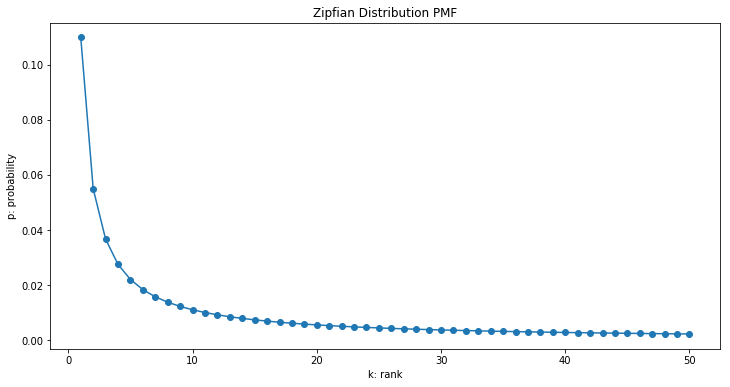

In [3]:
ranks = np.arange(1,51)
N = 5000
s = 1.0

plt.figure(figsize=(12,6))
plt.plot(ranks,f(ranks,N,s), 'o-')
plt.title("Zipfian Distribution PMF")
plt.xlabel("k: rank")
plt.ylabel("p: probability")
plt.show()

### Word Count from Project Gutenberg Free ebook Texts

This exercise will attempt to replicate the results from wordcount.org by processing a large volume of sample texts.  We'll use Spark to read the text data, process the texts, and examine the total number of unique words.  

We will sample 16 texts from [Project Gutenberg](https://www.gutenberg.org/ "Title").
Sample text files are in following location in repo:

`../data/books/`

# Q1. list the files in `../data/books/`

In [1]:
books_path = os.path.join('data', 'books')

# Q2. Load Text Files in Spark from above list

Load up the text files and create a text file RDD with name `textsRDD`.  Spark provides `textFile` method to read a text file and return it as a RDD.

In [2]:
textsRDD = sc.textFile(books_path)

In [ ]:
# print first 10 lines from textsRDD

In [3]:
# function to clean up the words
import re

def parsewords(sentence):
    # Convert all non-alphanumeric characters into empty string
    sentence_clean = re.sub(r'([^A-Za-z0-9\s+])', '', sentence)  
    words = sentence_clean.split(' ')
    # Convert to lowercase and eliminate empty string words
    return [word.lower() for word in words if word != ''] 

We have a a RDD - `textsRDD` that is a collection of strings. 

# Q3. Use mapping the function defined above - `parsewords` to each of the line of strings in `textsRDD` and show first 5 values.

hint: `map`

In [4]:
 # output looks like something which we dont want!
textsRDD.map(parsewords).take(5)

[[u'project',
  u'gutenbergs',
  u'frankenstein',
  u'by',
  u'mary',
  u'wollstonecraft',
  u'godwin',
  u'shelley'],
 [],
 [u'this',
  u'ebook',
  u'is',
  u'for',
  u'the',
  u'use',
  u'of',
  u'anyone',
  u'anywhere',
  u'at',
  u'no',
  u'cost',
  u'and',
  u'with'],
 [u'almost',
  u'no',
  u'restrictions',
  u'whatsoever',
  u'you',
  u'may',
  u'copy',
  u'it',
  u'give',
  u'it',
  u'away',
  u'or'],
 [u'reuse',
  u'it',
  u'under',
  u'the',
  u'terms',
  u'of',
  u'the',
  u'project',
  u'gutenberg',
  u'license',
  u'included']]

the result of mapping `parsewords` to `textsRDD` will yield lists of list which is not the result that we want. 

# Q4. Use another function which will give only one list having all words.

here also you have to apply `parsewords` function to create a new RDD of words. print first 5 values of the same.

Name this variable: `wordRDD`

output should look something like this:
```
['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'adventures',
 'of',
 'huckleberry',
 'finn',
 'complete',
 'by',]
 ```

In [5]:
wordRDD = textsRDD.flatMap(parsewords)
wordRDD.take(20)

[u'project',
 u'gutenbergs',
 u'frankenstein',
 u'by',
 u'mary',
 u'wollstonecraft',
 u'godwin',
 u'shelley',
 u'this',
 u'ebook',
 u'is',
 u'for',
 u'the',
 u'use',
 u'of',
 u'anyone',
 u'anywhere',
 u'at',
 u'no',
 u'cost']

if you have got an RDD of words, Congrats!

let's examine following:

# Q5. How many words are in our sample texts?

In [9]:
# Total Number of Words in our Sample


# Q6. Convert individual word into a pair of (word,1) tuple .

Convert RDD to each occurance of word into a (key,value) pair and create a new RDD called `wordPairRDD`. You should be familiar with this pattern. Refer **word count** example.

expected output:

```
[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('of', 1),
 ('adventures', 1),
 ('of', 1),....]
```

In [ ]:
# Convert individual word into a pair of (word,1) tuple 
wordPairRDD = 

# Q7. Sum up the counts and create a new RDD, `wordCountRDD`.

In [ ]:
wordCountRDD = 

# Q8. Print unique count of `wordCountRDD`.

In [5]:
# Number of Unique Words

Since `wordCountRDD` contains unique words and their counts, we sort them by `takeOrdered` method of RDD specifying the the ordering function to order by the values in (key,value) pairs.  We will only select top 50 words.

# Q9. Select Top 50 words in descending order of frequency 

# from `wordCountRDD`

In [ ]:
# Select Top 50 words in descending order of frequency
top50Words = 

# if you have completed till this stage. You've been good so far!

see below diagram to see what operations you have done so far.

### Chaining

<img src="../img/word_count_RDD_transformation.jpeg" width="600px">

Although we have performed each transformation in separate steps, Spark enables us to perform these four steps in one line of code by chaining them together.

# Q10. Use above operations from Q2-Q9 in a single line of code. Use Chaining.

> To get good identation use round brackets.

In [15]:
top50Words = (textsRDD.
                      .
                      .
                      .)

# Q11. Plot bar plot of frequencies of `top50Words`.

and see whether it follows **Zipf distribution** or not?